<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/1.%20Data%20Science%20Fundamentals/Simulacion_Examen_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

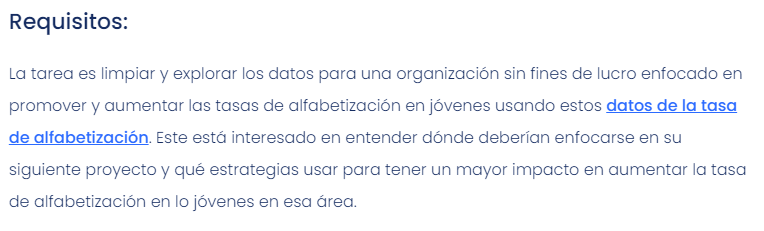

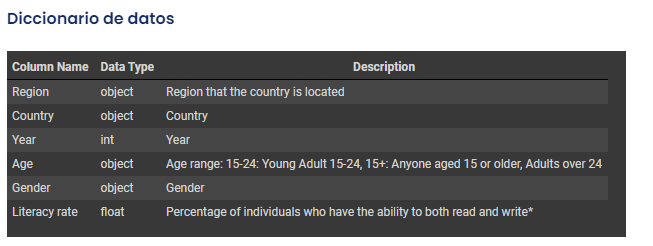

# Analisis exploratorio

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/literacy_rates.csv")

In [ ]:
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907


**Revision de registros duplicados**

In [ ]:
df.duplicated().sum()

0

**Revision de nulos**

In [ ]:
df.isna().sum()

Region           5
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [ ]:
df[df["Region"].isna()]

,Region,Country,Year,Age,Gender,Literacy rate
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
464,NaN,Uzbekistan,2016,65+,female,0.9966974999999999
465,NaN,Uzbekistan,2016,65+,male,0.9990176
466,NaN,Uzbekistan,2016,65+,total,0.9977187999999999


In [ ]:
df[df["Country"] == "Uzbekistan"].head()

,Region,Country,Year,Age,Gender,Literacy rate
419,Central and Southern Asia,Uzbekistan,2013,15+,female,0.9999587
420,Central and Southern Asia,Uzbekistan,2013,15+,male,0.9999383000000001
421,Central and Southern Asia,Uzbekistan,2013,15+,total,0.9999486000000001
422,Central and Southern Asia,Uzbekistan,2013,15-24,female,1.0
423,Central and Southern Asia,Uzbekistan,2013,15-24,male,1.0


* Los registros nulos vistos pertenecen a los paises Afghanistan y Uzbekistan, pertenecientes a la region "Central and Southern Asia".

In [ ]:
df["Region"].fillna("Central and Southern Asia", inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Age"].value_counts()

15+      1260
15-24    1239
25-64    1239
65+      1217
Name: Age, dtype: int64

* Eliminacion de Gender total, el cual era la sumna de male y female.

In [ ]:
df = df[df["Gender"] != "total"]

* Se limita universo a edades entre 24 - 64 

In [ ]:
df = df[df["Age"] == "15-24"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 3 to 4947
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         826 non-null    object
 1   Country        826 non-null    object
 2   Year           826 non-null    int64 
 3   Age            826 non-null    object
 4   Gender         826 non-null    object
 5   Literacy rate  826 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


In [ ]:
df["Literacy rate"] = df["Literacy rate"].astype(float)

# Visualizaciones 

In [ ]:
latin = df["Region"] == "Latin America and the Caribbean"

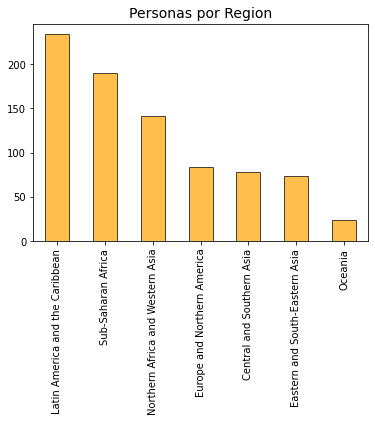

In [ ]:
df["Region"].value_counts().plot(kind="bar", color="orange", edgecolor="black", alpha=.7)
plt.xticks(rotation=90)
plt.title("Personas por Region", fontsize=14);

- Se pueden apreciar todas las regiones medidas, como tambien la region con mas muestras y la region con menos.

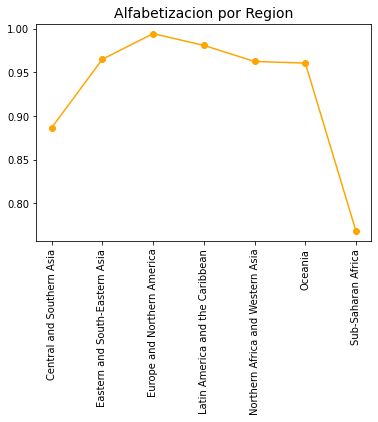

In [ ]:
df.groupby("Region")["Literacy rate"].mean().plot(kind="line", marker=".", markersize=12, color="orange")
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Alfabetizacion por Region", fontsize=14);

* Indices de alfabetizacion por region, Europa lidera con el indice mas alto mientras que Africa tiene el indice mas bajo.

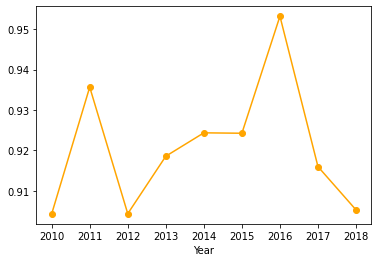

In [ ]:
df.groupby("Year")["Literacy rate"].mean().plot(kind="line", marker=".", markersize=12, color="orange")

* Linea temporal de indices de alfabetizacion a nivel global, donde se aprecian los años 2010 y 2012 como los mas bajos y el año 2016 como el año con el indice mas alto registrado.

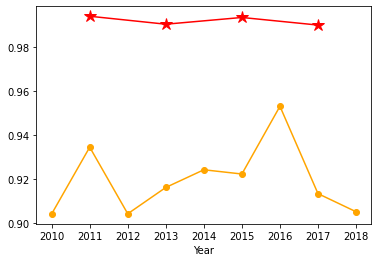

In [ ]:
df[df["Country"]== "Chile"].groupby("Year")["Literacy rate"].mean().plot(kind="line", marker="*", markersize=12, color="red")
df[df["Country"]!= "Chile"].groupby("Year")["Literacy rate"].mean().plot(kind="line", marker=".", markersize=12, color="orange")


* Durante los años con registros, Chile se posiciona sobre la media de alfabetizacion a nivel global.